In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score,adjusted_rand_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r'HousePricePrediction.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0,856,208500
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0,1262,181500
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0,920,223500
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0,756,140000
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0,1145,250000


In [4]:
df.shape

(1460, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            1460 non-null   int64 
 1   MSSubClass    1460 non-null   int64 
 2   MSZoning      1460 non-null   object
 3   LotArea       1460 non-null   int64 
 4   LotConfig     1460 non-null   object
 5   BldgType      1460 non-null   object
 6   OverallCond   1460 non-null   int64 
 7   YearBuilt     1460 non-null   int64 
 8   YearRemodAdd  1460 non-null   int64 
 9   Exterior1st   1460 non-null   object
 10  BsmtFinSF2    1460 non-null   int64 
 11  TotalBsmtSF   1460 non-null   int64 
 12  SalePrice     1460 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 148.4+ KB


In [6]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (df.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 9
Float variables: 0


<AxesSubplot:>

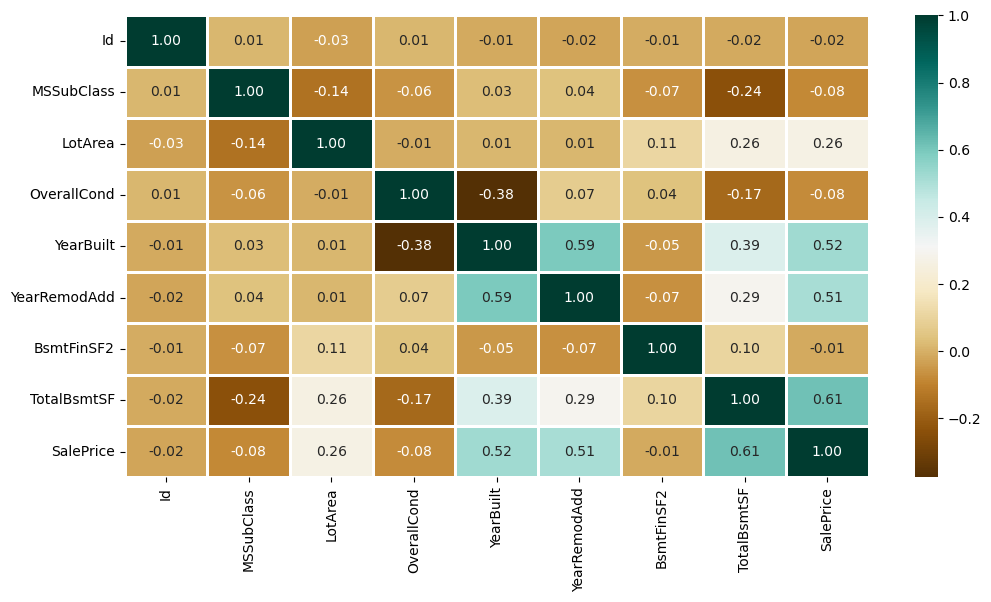

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [8]:
df.corr()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
Id,1.000000,0.011156,-0.033226,0.012609,-0.012713,-0.021998,-0.005968,-0.015415,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,-0.059316,0.027850,0.040581,-0.065649,-0.238518,-0.084284
LotArea,-0.033226,-0.139781,1.000000,-0.005636,0.014228,0.013788,0.111170,0.260833,0.263843
OverallCond,0.012609,-0.059316,-0.005636,1.000000,-0.375983,0.073741,0.040229,-0.171098,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,-0.375983,1.000000,0.592855,-0.049107,0.391452,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.073741,0.592855,1.000000,-0.067759,0.291066,0.507101
BsmtFinSF2,-0.005968,-0.065649,0.111170,0.040229,-0.049107,-0.067759,1.000000,0.104810,-0.011378
TotalBsmtSF,-0.015415,-0.238518,0.260833,-0.171098,0.391452,0.291066,0.104810,1.000000,0.613581
SalePrice,-0.021917,-0.084284,0.263843,-0.077856,0.522897,0.507101,-0.011378,0.613581,1.000000


<AxesSubplot:title={'center':'No. Unique values of Categorical Features'}>

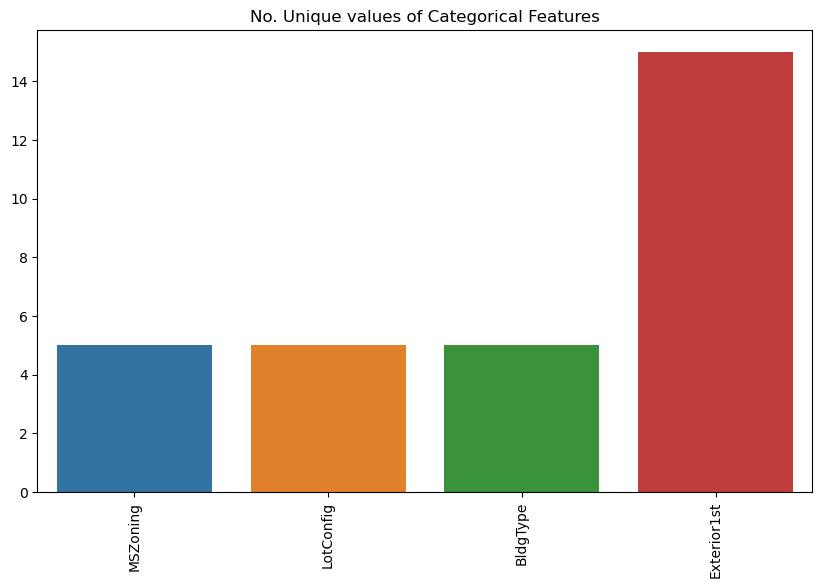

In [9]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

In [10]:
df.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0,856,208500
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0,1262,181500
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0,920,223500
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0,756,140000
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0,1145,250000
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0,796,143000
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0,1686,307000
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32,1107,200000
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0,952,129900
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0,991,118000


In [11]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

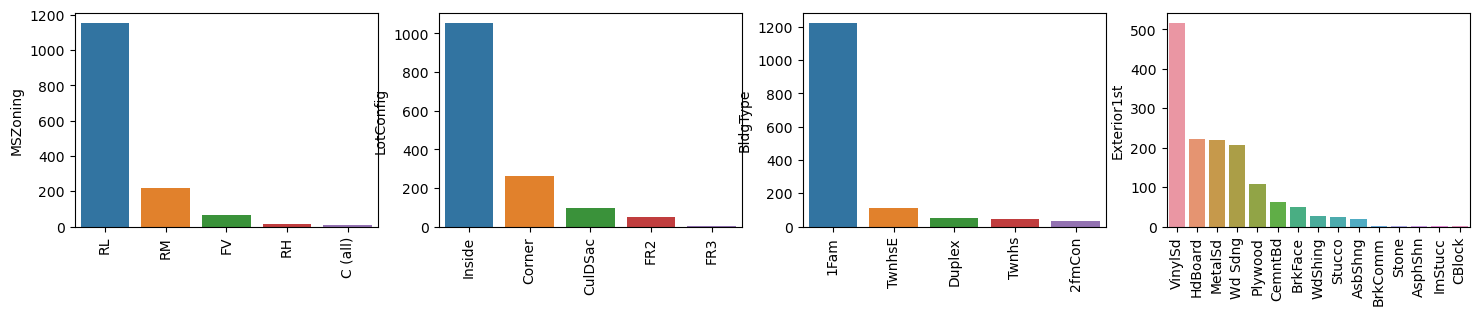

In [12]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

In [13]:
df.drop(['Id'],
             axis=1,
             inplace=True)

In [14]:
df

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0,856,208500
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0,1262,181500
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0,920,223500
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0,756,140000
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0,1145,250000
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0,953,175000
1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163,1542,210000
1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0,1152,266500
1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029,1078,142125


In [15]:
df.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [16]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [17]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df[object_cols]))
OH_cols.index = df.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = df.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
lb_encoder = LabelEncoder()
df['MSZoning']=lb_encoder.fit_transform(df['MSZoning'])

In [20]:
df.tail(20)

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
1440,70,3,11526,Inside,1Fam,7,1922,1994,MetalSd,0,588,191000
1441,120,4,4426,Inside,TwnhsE,5,2004,2004,VinylSd,0,848,149300
1442,60,1,11003,Inside,1Fam,5,2008,2008,VinylSd,0,1017,310000
1443,30,3,8854,Inside,1Fam,6,1916,1950,Wd Sdng,0,952,121000
1444,20,3,8500,FR2,1Fam,5,2004,2004,VinylSd,0,1422,179600
1445,85,3,8400,Inside,1Fam,5,1966,1966,VinylSd,627,814,129000
1446,20,3,26142,CulDSac,1Fam,7,1962,1962,HdBoard,0,1188,157900
1447,60,3,10000,Inside,1Fam,5,1995,1996,VinylSd,0,1220,240000
1448,50,3,11767,Inside,1Fam,7,1910,2000,MetalSd,0,560,112000
1449,180,4,1533,Inside,Twnhs,7,1970,1970,CemntBd,0,630,92000


In [21]:
df_final.columns

Index(['MSSubClass', 'LotArea', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF2', 'TotalBsmtSF', 'SalePrice', 'x0_C (all)', 'x0_FV',
       'x0_RH', 'x0_RL', 'x0_RM', 'x1_Corner', 'x1_CulDSac', 'x1_FR2',
       'x1_FR3', 'x1_Inside', 'x2_1Fam', 'x2_2fmCon', 'x2_Duplex', 'x2_Twnhs',
       'x2_TwnhsE', 'x3_AsbShng', 'x3_AsphShn', 'x3_BrkComm', 'x3_BrkFace',
       'x3_CBlock', 'x3_CemntBd', 'x3_HdBoard', 'x3_ImStucc', 'x3_MetalSd',
       'x3_Plywood', 'x3_Stone', 'x3_Stucco', 'x3_VinylSd', 'x3_Wd Sdng',
       'x3_WdShing'],
      dtype='object')

In [22]:
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']
 
# Split the training set into
# training and validation set
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=10)

In [23]:
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train,Y_train)
Y_pred = model_dt.predict(X_test)
 
print(mean_absolute_percentage_error(Y_test, Y_pred))

0.17334895145041526


In [24]:
pred = pd.DataFrame(Y_pred)

In [25]:
pred

,0
0,200500.0
1,193879.0
2,144000.0
3,139000.0
4,253000.0
...,...
287,82000.0
288,143000.0
289,339750.0
290,163900.0
